In [2]:
import  cv2

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from matplotlib.image import imread

In [6]:
image = cv2.imread("C:/Users/Jagadeesh/Downloads/Lenna_(test_image).png")

In [7]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [8]:
rgb_image

array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]

In [9]:
rgb_image.shape

(512, 512, 3)

In [10]:
height, width, color_channels = rgb_image.shape

In [11]:
print(f"Image size : {height}*{width}*{color_channels}")

Image size : 512*512*3


(-0.5, 511.5, 511.5, -0.5)

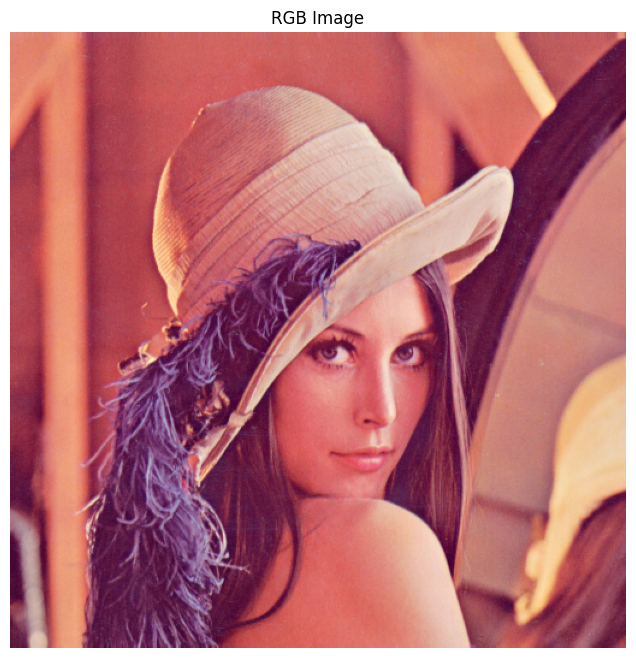

In [12]:
plt.figure(figsize=(8, 8))
plt.imshow(rgb_image)
plt.title("RGB Image")
plt.axis("off")

## Average method

In [13]:
average_gray = np.mean(rgb_image, axis=2).astype(np.uint8)

(-0.5, 511.5, 511.5, -0.5)

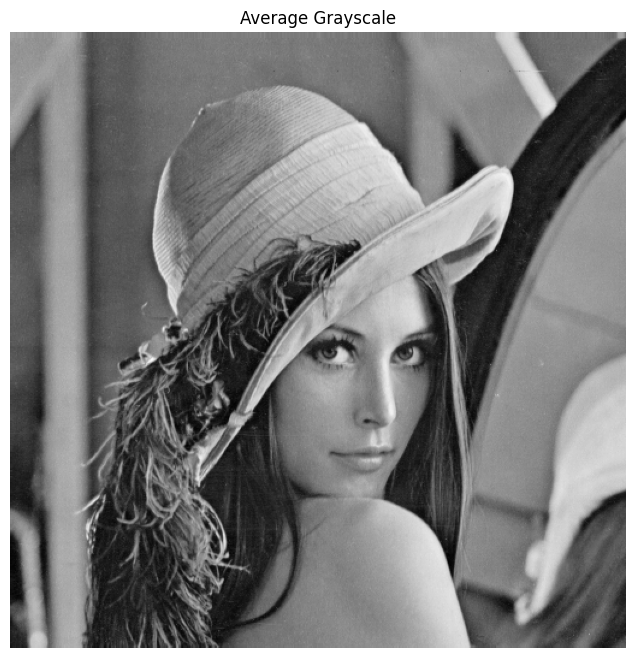

In [14]:
# Average Grayscale
plt.figure(figsize=(8, 8))
plt.imshow(average_gray, cmap="gray")
plt.title("Average Grayscale")
plt.axis("off")

## weighted/luminance method

In [15]:
r, g, b = rgb_image[:, :, 0], rgb_image[:, :, 1], rgb_image[:, :, 2]

In [16]:
r_const, g_const, b_const = 0.2126, 0.7152, 0.0722

In [17]:
weighted_grey = (r*r_const+g*g_const+ b*b_const)

(-0.5, 511.5, 511.5, -0.5)

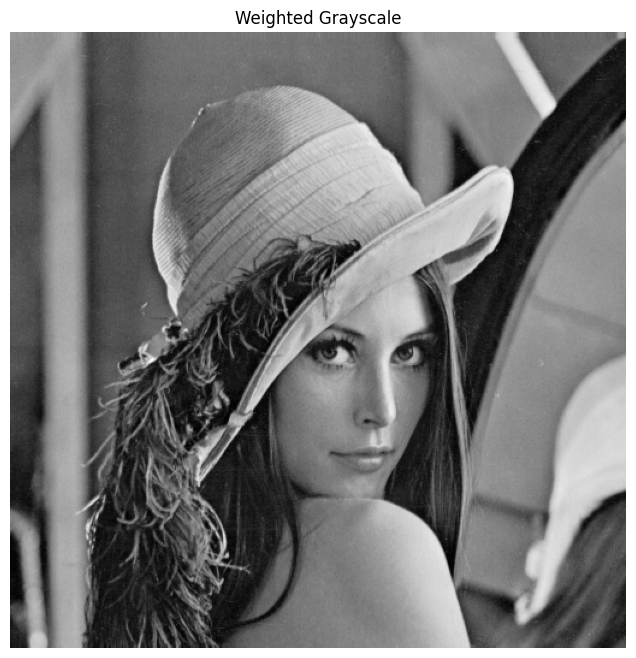

In [18]:
plt.figure(figsize=(8,8))
plt.imshow(weighted_grey , cmap="gray")
plt.title("Weighted Grayscale")
plt.axis("off")

## cv2 method:

In [19]:
cv2_gray = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)

(-0.5, 511.5, 511.5, -0.5)

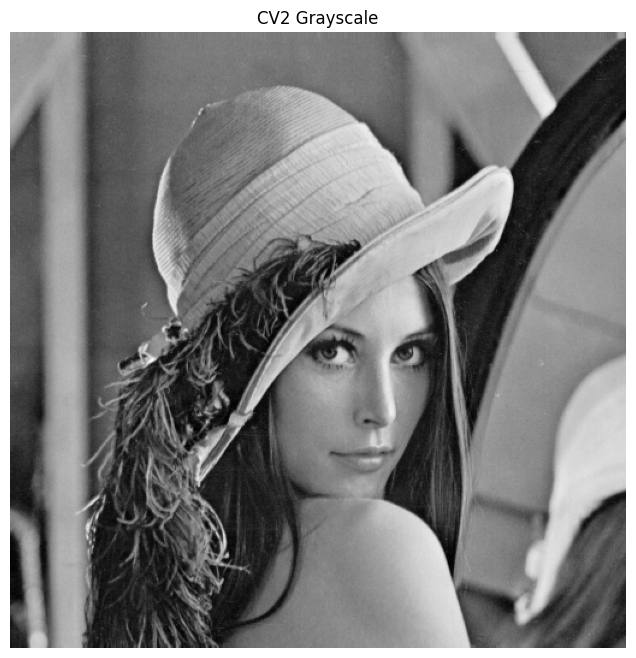

In [20]:
plt.figure(figsize=(8,8))
plt.imshow(cv2_gray , cmap="gray")
plt.title("CV2 Grayscale")
plt.axis("off")

## Histogram Equalization

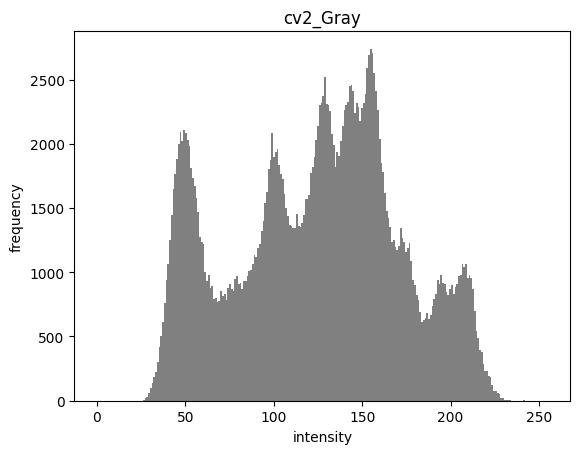

In [21]:
plt.hist(cv2_gray.flatten(), bins=256, range=(0, 255), color='gray')
plt.title("cv2_Gray")
plt.xlabel("intensity")
plt.ylabel("frequency")
plt.show()

## cv2 method

In [22]:
equalized_cv2 = cv2.equalizeHist(cv2_gray)

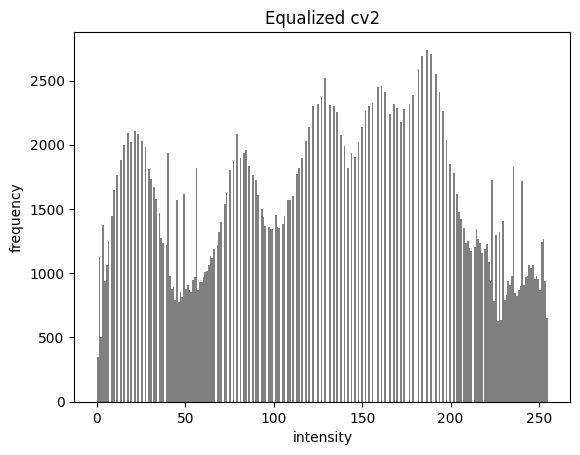

In [23]:
plt.hist(equalized_cv2.flatten(), bins=256, range=(0, 255), color='gray')
plt.title("Equalized cv2")
plt.xlabel("intensity")
plt.ylabel("frequency")
plt.show()

## manual

In [24]:
cv2_histogram = cv2.calcHist([cv2_gray], [0], None, [256], [0, 256])

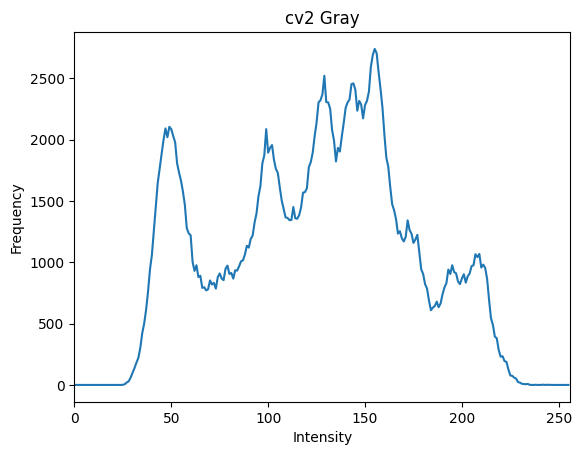

In [25]:
plt.title("cv2 Gray")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.plot(cv2_histogram)
plt.xlim([0, 256])
plt.show()

In [26]:
hist, bins = np.histogram(cv2_gray.flatten(), bins=256, range=[0, 256])

In [27]:
cdf = hist.cumsum()
cdf_normalized = cdf * 255 / cdf[-1]  

In [28]:
equalized_image = cdf_normalized[cv2_gray]

In [29]:
equalized_image = np.uint8(equalized_image)

Text(0, 0.5, 'Frequency')

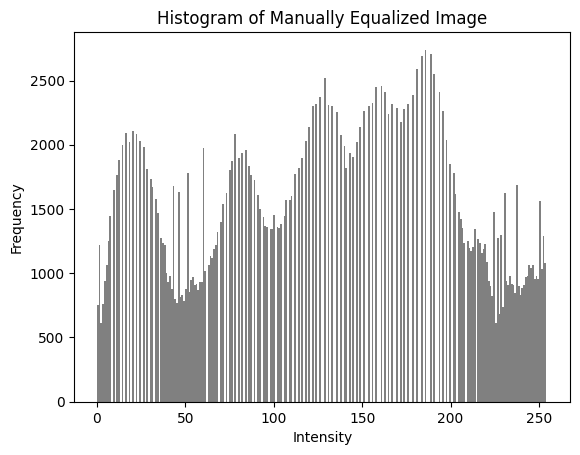

In [30]:
plt.hist(equalized_image.flatten(), bins=256, range=(0, 255), color='gray')
plt.title("Histogram of Manually Equalized Image")
plt.xlabel("Intensity")
plt.ylabel("Frequency")

(-0.5, 511.5, 511.5, -0.5)

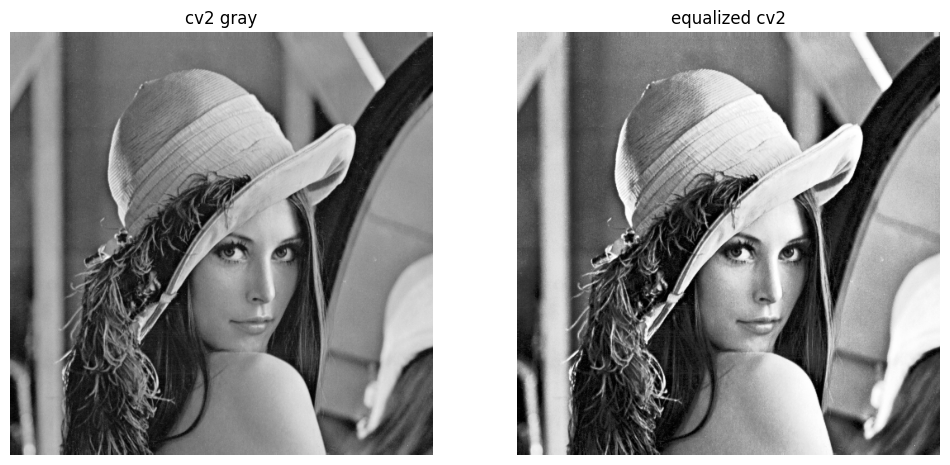

In [31]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
plt.imshow(cv2_gray,cmap='gray')
plt.title("cv2 gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(equalized_cv2,cmap='gray')
plt.title("equalized cv2")
plt.axis("off")


## Image Resizing

In [32]:
reduced_image=cv2.resize(rgb_image, (256,256))

In [33]:
increased_image=cv2.resize(rgb_image, (1024,1024))

In [34]:
rgb_image.shape

(512, 512, 3)

In [35]:
reduced_image.shape

(256, 256, 3)

In [36]:
increased_image.shape

(1024, 1024, 3)

(-0.5, 1023.5, 1023.5, -0.5)

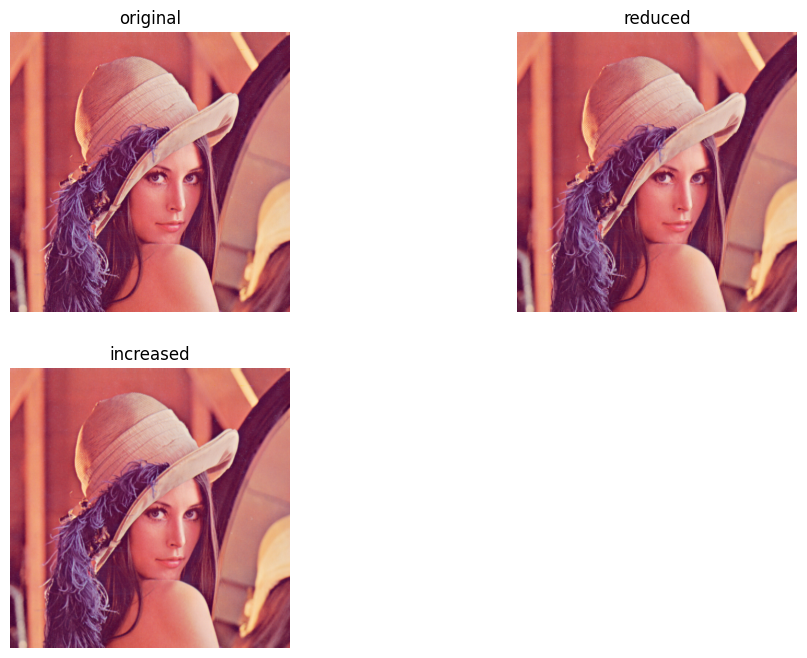

In [37]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
plt.imshow(rgb_image)
plt.title("original")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(reduced_image)
plt.title("reduced")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(increased_image)
plt.title("increased")
plt.axis("off")

## manual:

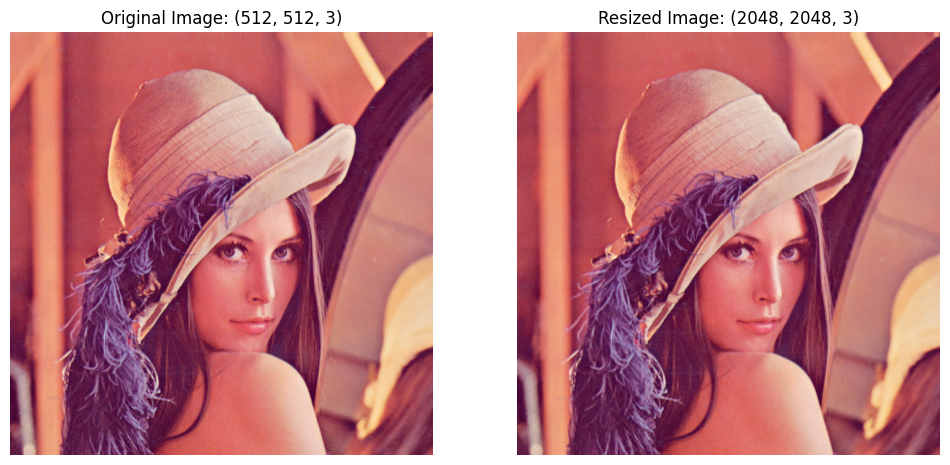

In [38]:
def image_resize(image, new_width, new_height):
    # Get original image dimensions
    height, width, channels = image.shape
    # Initialize an empty array for resized image
    resized_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)
    # Calculate scaling factors
    x_scale = width / new_width
    y_scale = height / new_height

    # Map pixels from original to resized image
    for i in range(new_height):
        for j in range(new_width):
            original_x = min(int(j * x_scale), width - 1)
            original_y = min(int(i * y_scale), height - 1)
            resized_image[i, j] = image[original_y, original_x]

    return resized_image

# New dimensions
new_width = 2048
new_height = 2048

# Resize the image manually
zoomed_image = image_resize(rgb_image, new_width, new_height)

# Display the images side by side
#fig, axs = plt.subplots(1, 2, figsize=(12, 6))
#axs[0].imshow(rgb_image)
#axs[0].set_title('Original Image: ' + str(rgb_image.shape))
#axs[0].axis('off')
#axs[1].imshow(zoomed_image)
#axs[1].set_title('Resized Image: ' + str(zoomed_image.shape))
#axs[1].axis('off')
#plt.show()

import matplotlib.pyplot as plt

# Display the images side by side
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title(f'Original Image: {rgb_image.shape}')
plt.axis('off')

# Resized/Zoomed Image
plt.subplot(1, 2, 2)
plt.imshow(zoomed_image)
plt.title(f'Resized Image: {zoomed_image.shape}')
plt.axis('off')

# Show the plots
plt.show()


In [39]:
zoomed_image.shape

(2048, 2048, 3)